In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data_utils
import torch.utils.data as utils
import torchvision.transforms as transforms
import pandas as pd
from scipy.stats import norm
from torch.autograd import Variable
from torch.utils.data.dataloader import DataLoader
from torchvision.datasets import MNIST
from torchvision.utils import make_grid as make_image_grid
import csv
import math
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy import cluster
torch.manual_seed(2017) # reproducability
sns.set_style('dark')
%matplotlib inline

# Load data

In [4]:
data = pd.read_csv("calls_blue2.csv")

In [5]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.7433,0.7434,0.7435,0.7436,0.7437,0.7438,0.7439,0.7440,0.7441,491
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,208
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,632
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,49
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,48
4,0,10,12,12,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,357


In [6]:
print (len(data))

2027


In [7]:
user_munber_list = data.reset_index()[['0.7441', '491']].values.tolist()

In [8]:
user_munber_list[:10]

[[0, 208],
 [0, 632],
 [3, 49],
 [3, 48],
 [3, 357],
 [4, 266],
 [4, 15],
 [4, 144],
 [4, 401],
 [4, 154]]

In [9]:
del data['0.7441']
del data['491']
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.7431,0.7432,0.7433,0.7434,0.7435,0.7436,0.7437,0.7438,0.7439,0.7440
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,10,12,12,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data_norm = data/data.values.max()
data_norm.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.7431,0.7432,0.7433,0.7434,0.7435,0.7436,0.7437,0.7438,0.7439,0.7440
0,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.078125,0.09375,0.09375,0.015625,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
data_norm = data_norm.dropna(how='any')
data_list = data_norm.values.tolist()
print (len(data_list[0]))
print (len(data_list))

8760
2027


In [12]:
data_list2 = []
for ele in data_list:
    data_list2.append(ele[:4380])

In [13]:
print (len(data_list2[0]))
print (len(data_list2))

4380
2027


##### Obtain top 10

In [14]:
sums = [[]]
for i in range(len(data_list2)):
    sums.append([i, sum(data_list2[i])])
del sums[0]
sums[:5]
worst = sums

In [15]:
sums.sort(key=lambda x: x[1], reverse = True)

In [16]:
sums[:10]

[[1003, 240.7734375],
 [1286, 234.359375],
 [1659, 210.6015625],
 [1356, 171.625],
 [957, 166.4140625],
 [142, 143.5859375],
 [1386, 140.8359375],
 [1690, 137.828125],
 [968, 134.6875],
 [1477, 133.4921875]]

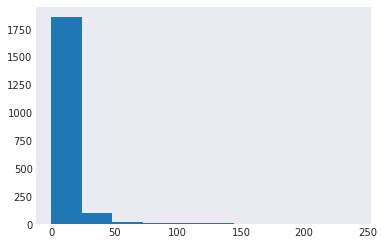

In [17]:
values = [item[1] for item in sums]
n, bins, patches = plt.hist(values)
plt.show()

###### Most of the dyads have between 0 and 0 interactions, that's an average of 0.011 interactions an hour

In [18]:
sums10=[item[0] for item in sums[:10]]
sumsall = [item[0] for item in sums]
#sums10

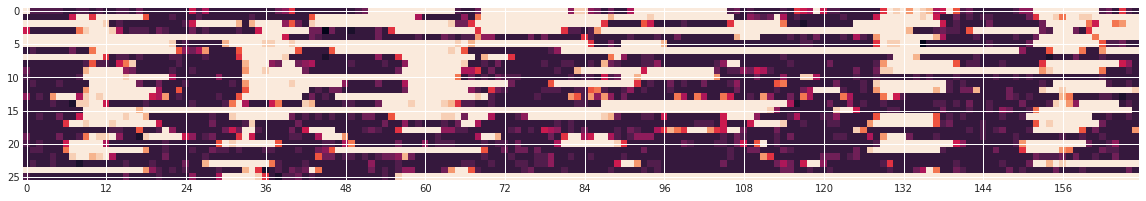

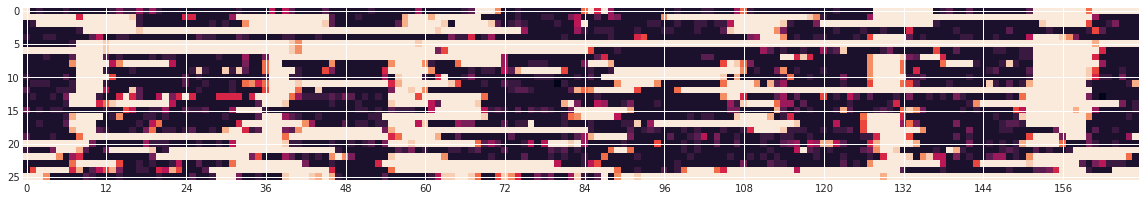

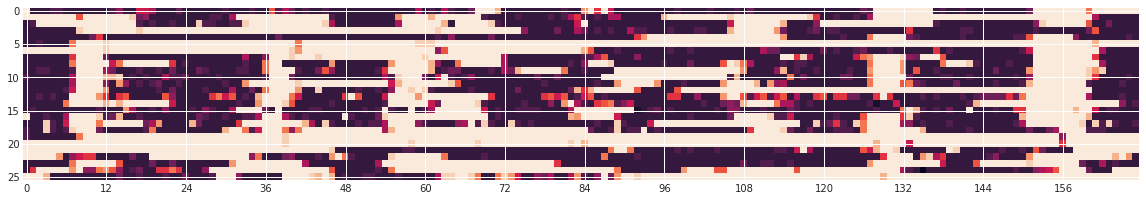

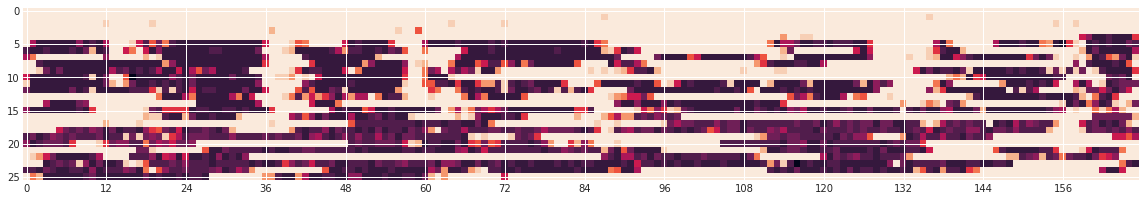

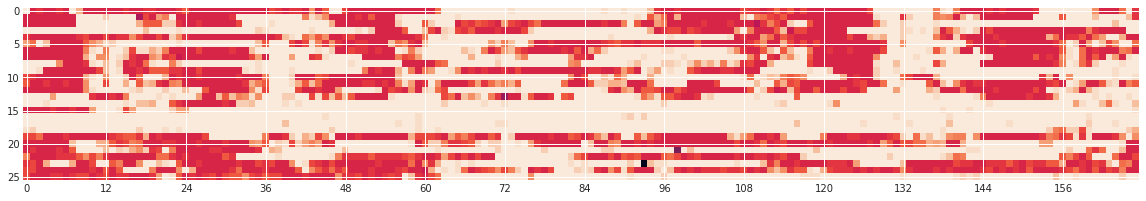

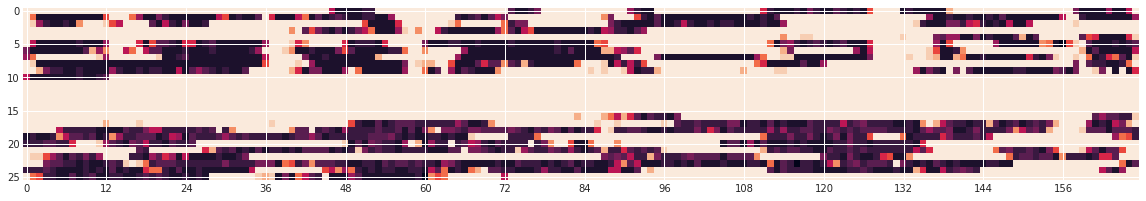

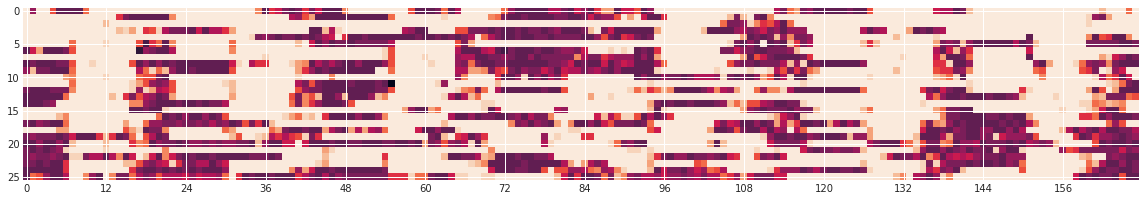

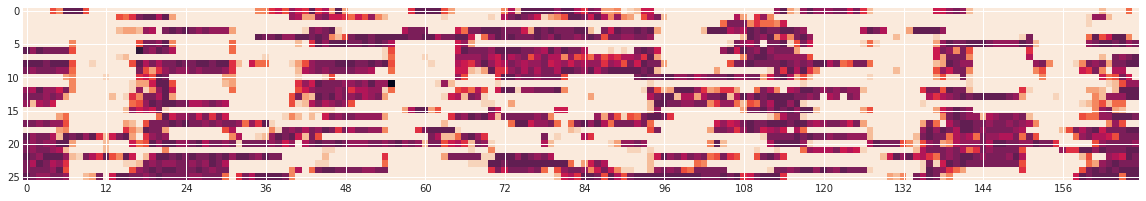

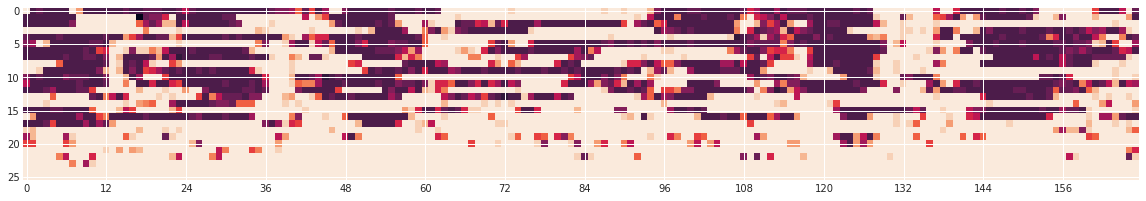

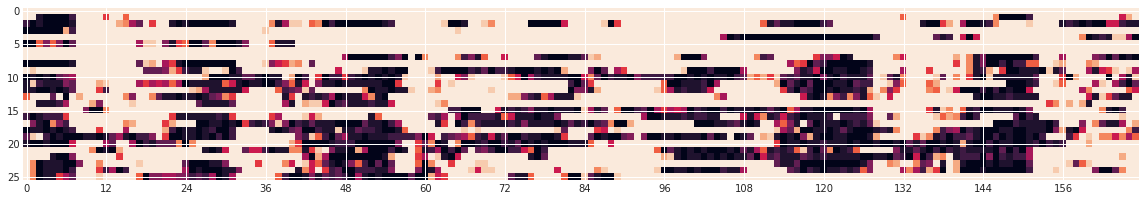

In [20]:
to_print = sums10
for i in range (len(to_print)):
    plt.figure(figsize=(20, 20))
    plt.imshow( 1-np.array(data_list2[to_print[i]][:4368]).reshape(26, 168))
    ax = plt.gca()
    ax.set_xticks(np.arange(0, 168, 12))
    ax.set_xticklabels(np.arange(0, 168, 12))
    ax.grid(color='w', linestyle='-', linewidth=1)
    #plt.savefig("imgage_halfyear{i}.png".format(i=i))

In [22]:
worst[:10]
worst10 =[item[0] for item in worst[:10]]
worst10

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

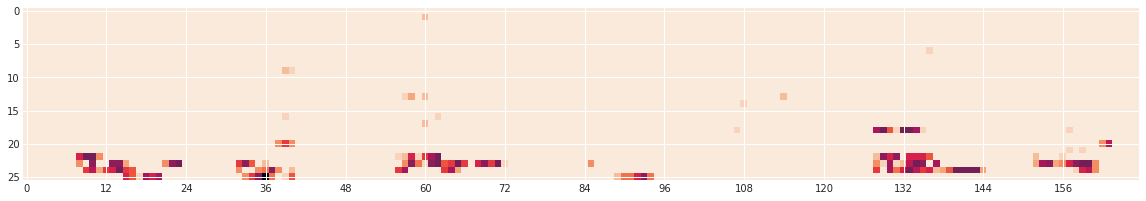

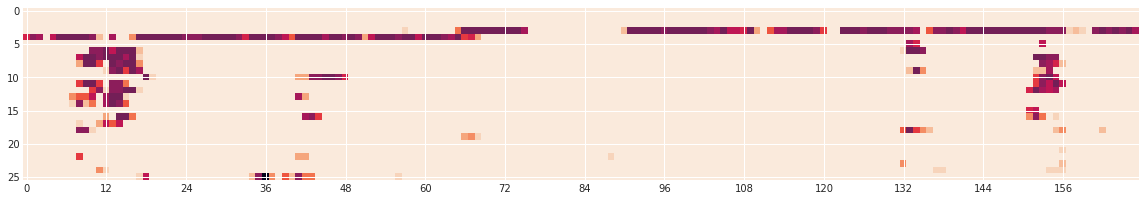

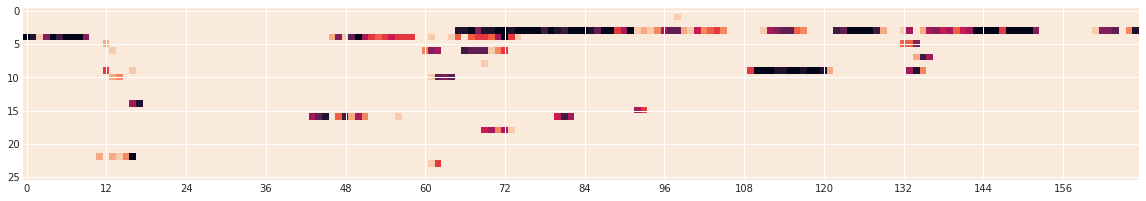

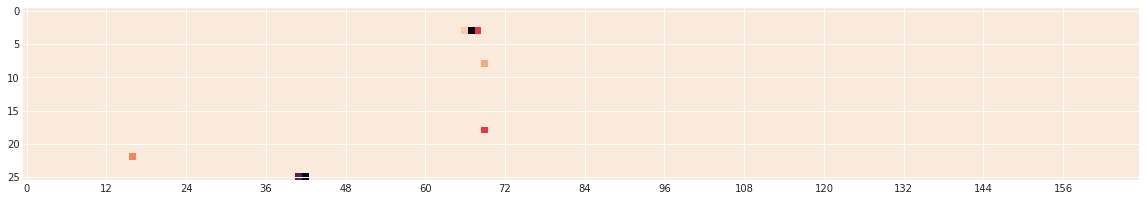

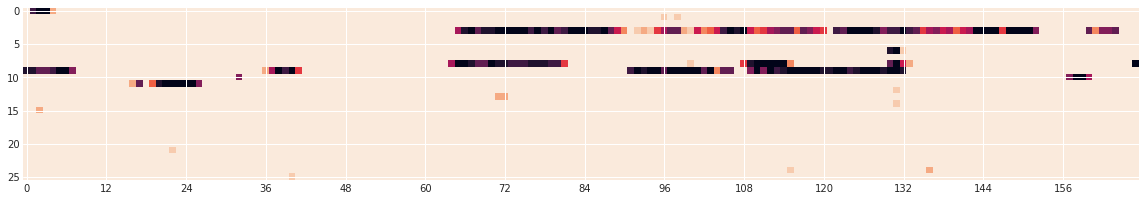

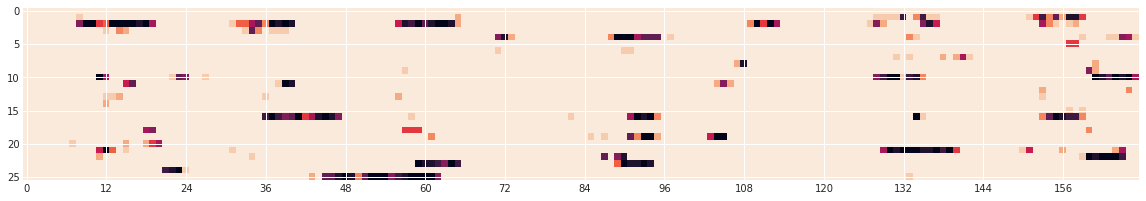

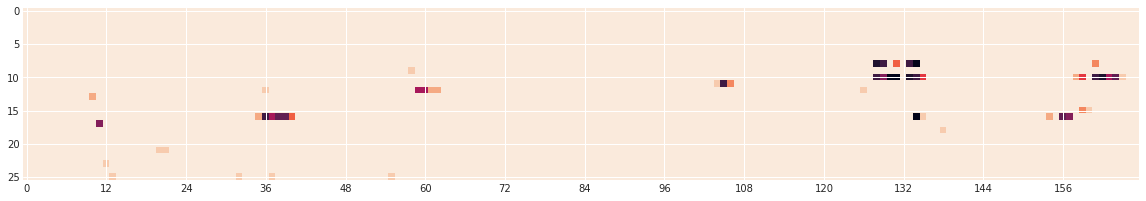

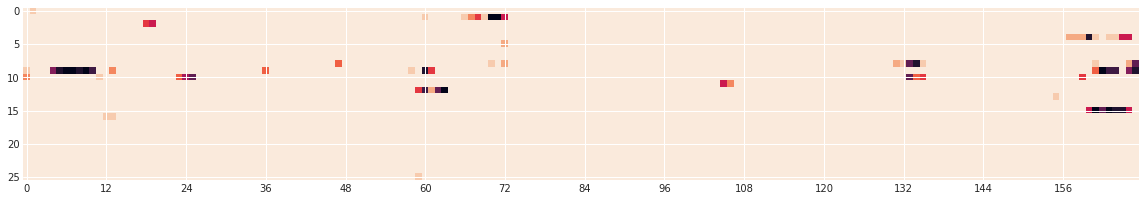

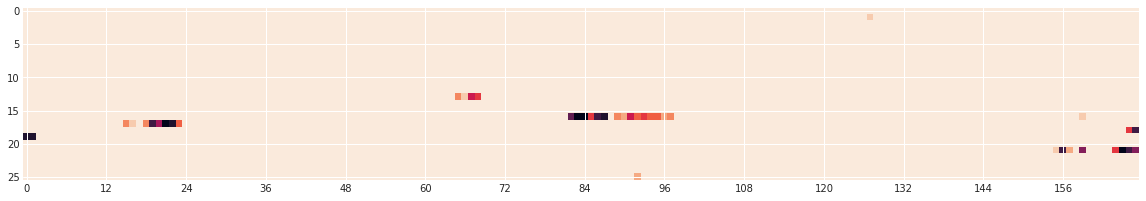

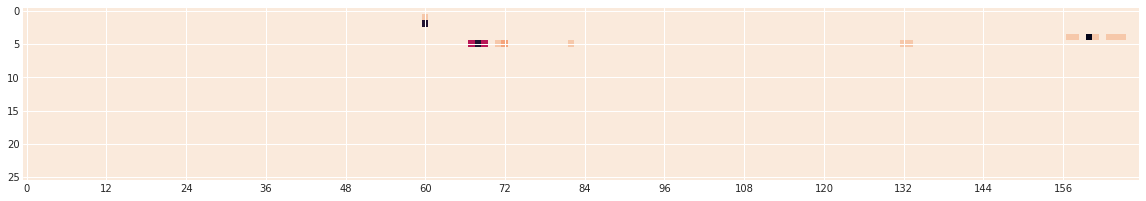

In [23]:
to_print = worst10
for i in range (len(to_print)):
    plt.figure(figsize=(20, 20))
    plt.imshow( 1-np.array(data_list2[to_print[i]][:4368]).reshape(26, 168))
    ax = plt.gca()
    ax.set_xticks(np.arange(0, 168, 12))
    ax.set_xticklabels(np.arange(0, 168, 12))
    ax.grid(color='w', linestyle='-', linewidth=1)
    plt.savefig("rgb{i}.png".format(i=i))

#### Pre - processing // Create database

In [180]:
arrays = [np.array(item) for item in data_list2]
tensor_x = torch.stack([torch.Tensor(i) for i in arrays])

In [181]:
my_dataset = utils.TensorDataset(tensor_x,tensor_x)

### Autoencoder

In [161]:
torch.set_num_threads(18)
# Model
class Autoenc(nn.Module):
    def __init__(self,latent_dim=20,hidden_dim1=2000, hidden_dim2=500, 
                 hidden_dim3=125):
        super(Autoenc,self).__init__()
        self.fc_e1 = nn.Linear(4380,hidden_dim1)
        self.fc_e2 = nn.Linear(hidden_dim1,hidden_dim2)
        self.fc_e3 = nn.Linear(hidden_dim2,hidden_dim3)

        self.fc_lat = nn.Linear(hidden_dim3,latent_dim)
        
        self.fc_d1 = nn.Linear(latent_dim,hidden_dim3)
        self.fc_d2 = nn.Linear(hidden_dim3,hidden_dim2)
        self.fc_d3 = nn.Linear(hidden_dim2,hidden_dim1)
        self.fc_d4 = nn.Linear(hidden_dim1, 4380)
            
    def encoder(self,x_in):
        x = F.relu(self.fc_e1(x_in.view(-1,4380)))
        x = F.relu(self.fc_e2(x))
        x = F.relu(self.fc_e3(x))
        lat = self.fc_lat(x)
        return lat
    
    def decoder(self,z):
        z = F.relu(self.fc_d1(z))
        z = F.relu(self.fc_d2(z))
        z = F.relu(self.fc_d3(z))
        x_out = F.sigmoid(self.fc_d4(z))
        return x_out#.view(-1,1,28,28)
    
    
    def forward(self,x_in):
        z_lat = self.encoder(x_in)
        x_out = self.decoder(z_lat)
        return x_out, z_lat
model = Autoenc()
model

Autoenc(
  (fc_e1): Linear(in_features=4380, out_features=2000, bias=True)
  (fc_e2): Linear(in_features=2000, out_features=500, bias=True)
  (fc_e3): Linear(in_features=500, out_features=125, bias=True)
  (fc_lat): Linear(in_features=125, out_features=20, bias=True)
  (fc_d1): Linear(in_features=20, out_features=125, bias=True)
  (fc_d2): Linear(in_features=125, out_features=500, bias=True)
  (fc_d3): Linear(in_features=500, out_features=2000, bias=True)
  (fc_d4): Linear(in_features=2000, out_features=4380, bias=True)
)

#### Autoencoder droput

In [196]:
torch.set_num_threads(18)
# Model
class AutoencDrop(nn.Module):
    def __init__(self,latent_dim=20,hidden_dim1=2000, hidden_dim2=500, 
                 hidden_dim3=125):
        super(AutoencDrop,self).__init__()
        self.fc_e1 = nn.Linear(4380,hidden_dim1)
        self.drop1 = nn.Dropout(0.8)  # drop 50% of the neuron
        self.fc_e2 = nn.Linear(hidden_dim1,hidden_dim2)
        self.drop2 = nn.Dropout(0.8)  # drop 50% of the neuron
        self.fc_e3 = nn.Linear(hidden_dim2,hidden_dim3)
        self.drop3 = nn.Dropout(0.8)  # drop 50% of the neuron
        self.fc_lat = nn.Linear(hidden_dim3,latent_dim)
        
        self.fc_d1 = nn.Linear(latent_dim,hidden_dim3)
        self.drop4 = nn.Dropout(0.8)  # drop 50% of the neuron
        self.fc_d2 = nn.Linear(hidden_dim3,hidden_dim2)
        self.drop5 = nn.Dropout(0.8)  # drop 50% of the neuron
        self.fc_d3 = nn.Linear(hidden_dim2,hidden_dim1)
        self.drop6 = nn.Dropout(0.8)  # drop 50% of the neuron
        self.fc_d4 = nn.Linear(hidden_dim1, 4380)
            
    def encoder(self,x_in):
        x = F.relu(self.fc_e1(x_in.view(-1,4380)))
        x = F.relu(self.fc_e2(x))
        x = F.relu(self.fc_e3(x))
        lat = self.fc_lat(x)
        return lat
    
    def decoder(self,z):
        z = F.relu(self.fc_d1(z))
        z = F.relu(self.fc_d2(z))
        z = F.relu(self.fc_d3(z))
        x_out = F.sigmoid(self.fc_d4(z))
        return x_out#.view(-1,1,28,28)
    
    
    def forward(self,x_in):
        z_lat = self.encoder(x_in)
        x_out = self.decoder(z_lat)
        return x_out, z_lat
model = AutoencDrop()
model

AutoencDrop(
  (fc_e1): Linear(in_features=4380, out_features=2000, bias=True)
  (drop1): Dropout(p=0.8)
  (fc_e2): Linear(in_features=2000, out_features=500, bias=True)
  (drop2): Dropout(p=0.8)
  (fc_e3): Linear(in_features=500, out_features=125, bias=True)
  (drop3): Dropout(p=0.8)
  (fc_lat): Linear(in_features=125, out_features=20, bias=True)
  (fc_d1): Linear(in_features=20, out_features=125, bias=True)
  (drop4): Dropout(p=0.8)
  (fc_d2): Linear(in_features=125, out_features=500, bias=True)
  (drop5): Dropout(p=0.8)
  (fc_d3): Linear(in_features=500, out_features=2000, bias=True)
  (drop6): Dropout(p=0.8)
  (fc_d4): Linear(in_features=2000, out_features=4380, bias=True)
)

In [197]:
num_epochs = 100
batch_size = 128
learning_rate = 1e-2

# Data loader
trainloader = DataLoader(my_dataset, batch_size = batch_size,shuffle=True)

In [198]:
model = AutoencDrop()
#model = autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)
losses = []

#train
for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        img = Variable(img)
        # ===================forward=====================
        x_out,z_lat = model(img)
        loss = criterion(x_out, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.data[0])
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.data[0]))

#torch.save(model.state_dict(), './sim_autoencoder.pth')

epoch [1/100], loss:0.0002
epoch [2/100], loss:0.0002
epoch [3/100], loss:0.0020
epoch [4/100], loss:0.0027
epoch [5/100], loss:0.0142
epoch [6/100], loss:0.0009
epoch [7/100], loss:0.0172
epoch [8/100], loss:0.0825
epoch [9/100], loss:0.0085
epoch [10/100], loss:0.0024
epoch [11/100], loss:0.0040
epoch [12/100], loss:0.0221
epoch [13/100], loss:0.0075
epoch [14/100], loss:0.0038
epoch [15/100], loss:0.0011
epoch [16/100], loss:0.0009
epoch [17/100], loss:0.0004
epoch [18/100], loss:0.0002
epoch [19/100], loss:0.0002
epoch [20/100], loss:0.0001
epoch [21/100], loss:0.0002
epoch [22/100], loss:0.0002
epoch [23/100], loss:0.0002
epoch [24/100], loss:0.0002
epoch [25/100], loss:0.0002
epoch [26/100], loss:0.0002
epoch [27/100], loss:0.0001
epoch [28/100], loss:0.0002
epoch [29/100], loss:0.0002
epoch [30/100], loss:0.0001
epoch [31/100], loss:0.0002
epoch [32/100], loss:0.0002
epoch [33/100], loss:0.0002
epoch [34/100], loss:0.0002
epoch [35/100], loss:0.0002
epoch [36/100], loss:0.0001
e

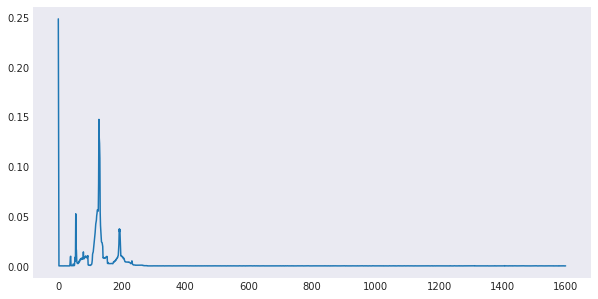

In [199]:
plt.figure(figsize = (10,5))
plt.plot(losses)
plt.show()

In [200]:
testloader = DataLoader(my_dataset, batch_size=128)

#Test
def Obtain_img (model, dataloader):
    output = []
    latents = []
    running_loss = 0.0
    for data in dataloader:
        img, _ = data
        x_in = Variable(img)
        x_out, z_lat = model(x_in)
        output.append(x_out.data.numpy())
        latents.append(z_lat.data.numpy())
        loss = criterion(x_out, x_in)
        running_loss = running_loss + (loss.data[0]*x_in.size(0))
    return output, latents, running_loss/len(dataloader.dataset)

output, latents, loss = Obtain_img (model, testloader)
print (loss)

0.00017254952978874364


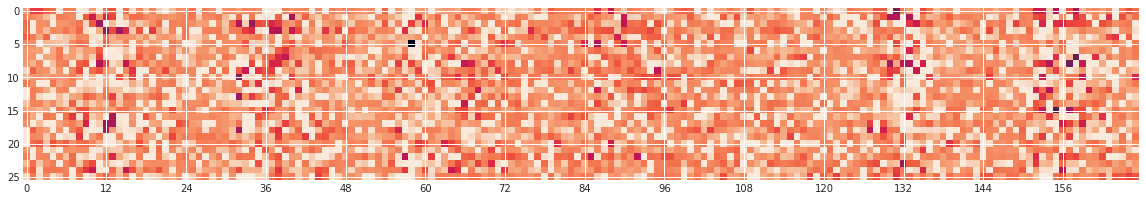

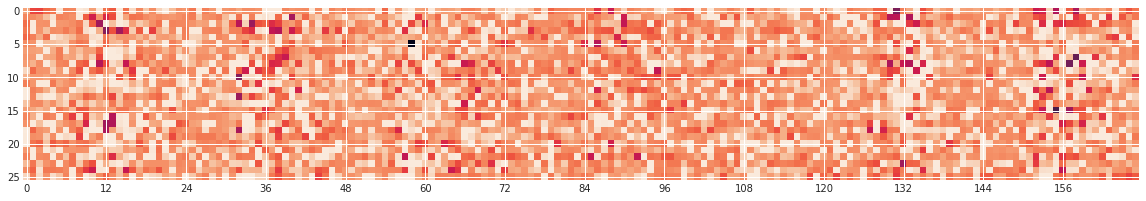

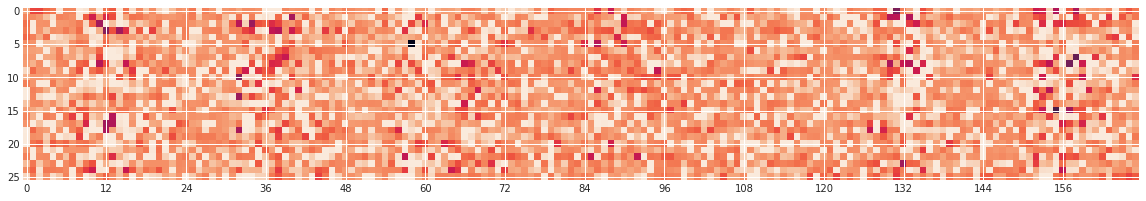

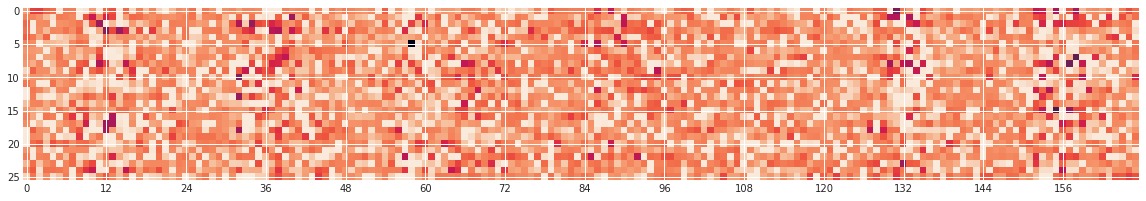

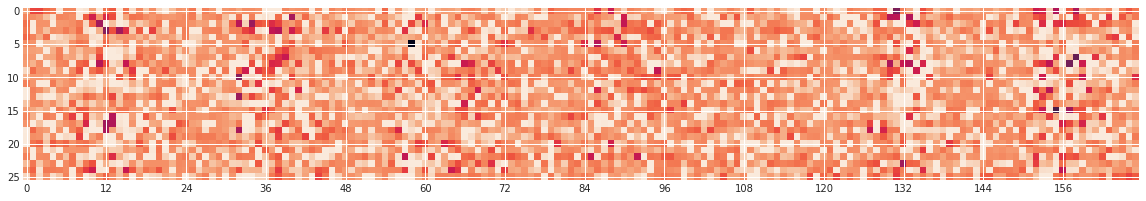

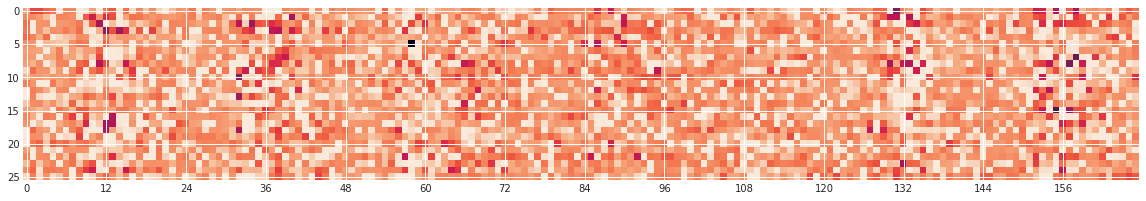

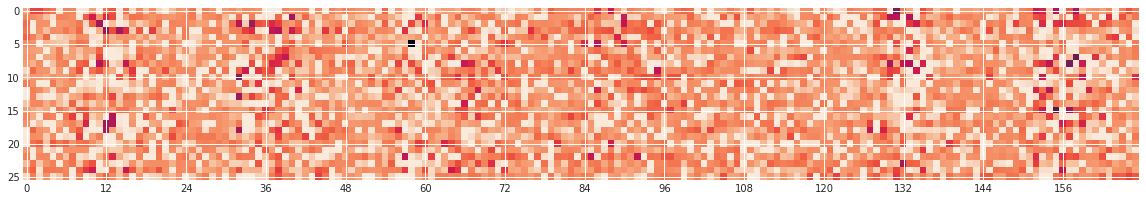

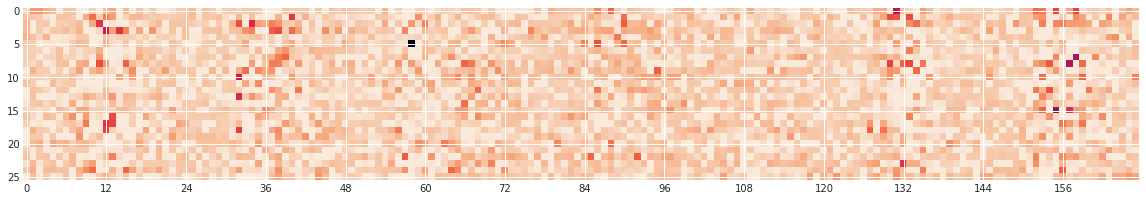

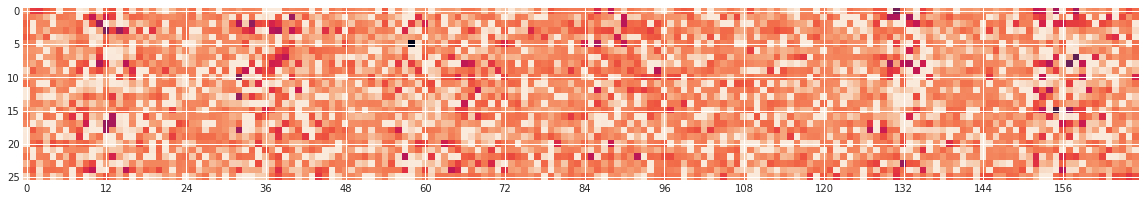

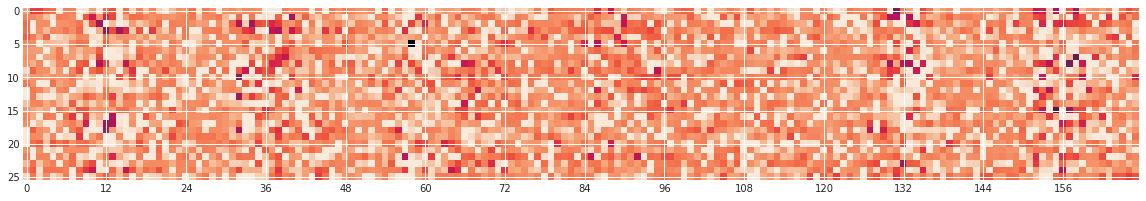

In [201]:
to_print = sums[:10]
for i in range (len(to_print)):
    plt.figure(figsize=(20, 20))
    plt.imshow(1- (output[i][0][:4368]).reshape(26, 168))
    ax = plt.gca()
    ax.set_xticks(np.arange(0, 168, 12))
    ax.set_xticklabels(np.arange(0, 168, 12))
    ax.grid(color='w', linestyle='-', linewidth=1)
    #plt.savefig("test2_batch32_100ep_{i}.png".format(i=i))

to_print = sums[:10]
for i in range (len(to_print)):
    plt.figure(figsize=(20, 20))
    plt.imshow((latents[[i][0]]))

latent = []
for ele in latents:
    latent.append(ele[0])
f, axarr = plt.subplots(3, 2, figsize=(20,30))

latent_proj = TSNE(n_components=2, perplexity=2).fit_transform(latent)
axarr[0, 0].scatter(latent_proj[:, 0], latent_proj[:, 1])#, c=all_labels)
axarr[0, 0].set_title('Perplexity 2')

latent_proj = TSNE(n_components=2, perplexity=5).fit_transform(latent)
axarr[0, 1].scatter(latent_proj[:, 0], latent_proj[:, 1])#, c=all_labels)
axarr[0, 1].set_title('Perplexity 5')

latent_proj = TSNE(n_components=2, perplexity=30).fit_transform(latent)
axarr[1, 0].scatter(latent_proj[:, 0], latent_proj[:, 1])#, c=all_labels)
axarr[1, 0].set_title('Perplexity 30')

latent_proj = TSNE(n_components=2, perplexity=50).fit_transform(latent)
axarr[1, 1].scatter(latent_proj[:, 0], latent_proj[:, 1])#, c=all_labels)
axarr[1, 1].set_title('Perplexity 50')

latent_proj = TSNE(n_components=2, perplexity=100).fit_transform(latent)
axarr[2, 0].scatter(latent_proj[:, 0], latent_proj[:, 1])#, c=all_labels)
axarr[2, 0].set_title('Perplexity 100')

#### Double the amount of data

In [202]:
data_list3 = []
for ele in data_list2:
    data_list3.append(ele[:2190])
    data_list3.append(ele[2190:])
print (len(data_list2))
print (len(data_list3))

2027
4054


##### Obtain top 10

In [203]:
sums2 = [[]]
for i in range(len(data_list3)):
    sums2.append([i, sum(data_list3[i])])
del sums2[0]
sums2[:5]
worst2 = sums2

In [209]:
sums2.sort(key=lambda x: x[1], reverse = True)
#(sums2[2000:])

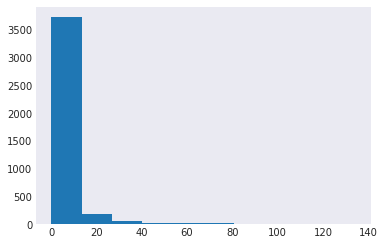

In [205]:
values = [item[1] for item in sums2]
n, bins, patches = plt.hist(values)
plt.show()

In [115]:
sums10_2=[item[0] for item in sums2[:10]]

sums10_2

[2007, 2573, 2572, 3318, 1936, 2006, 2713, 1914, 3319, 2955]

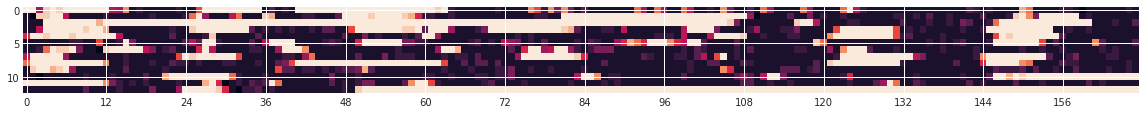

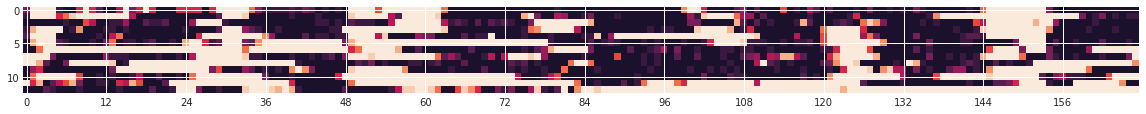

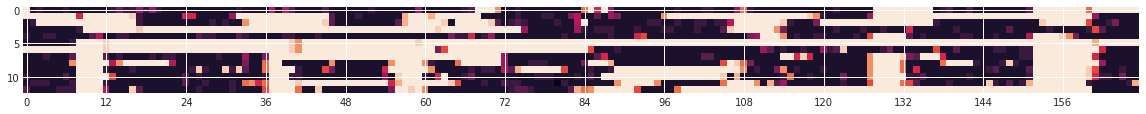

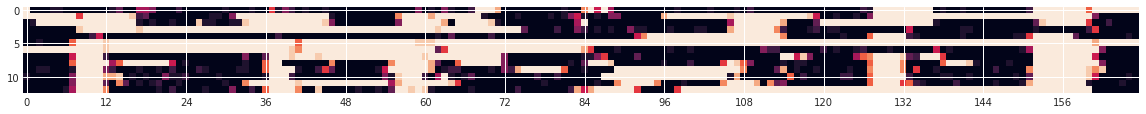

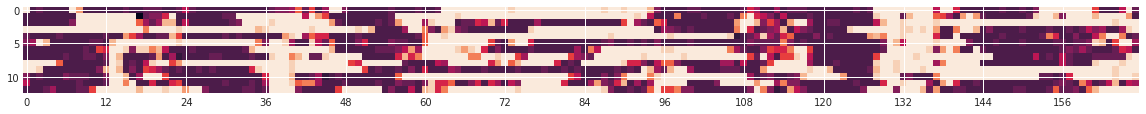

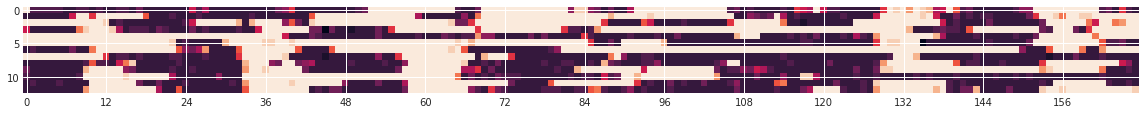

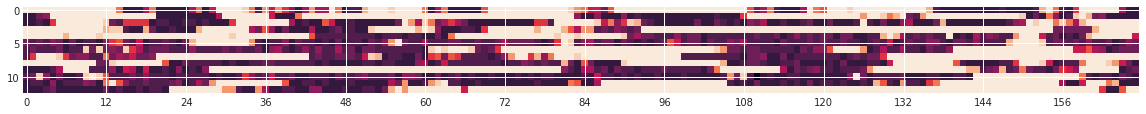

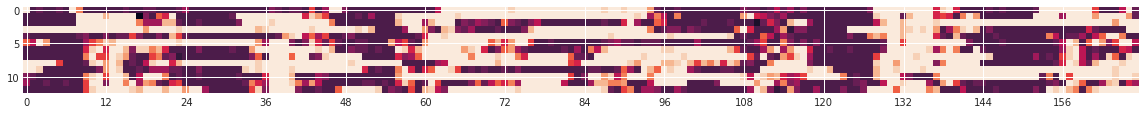

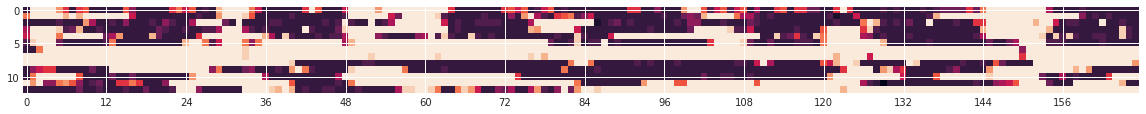

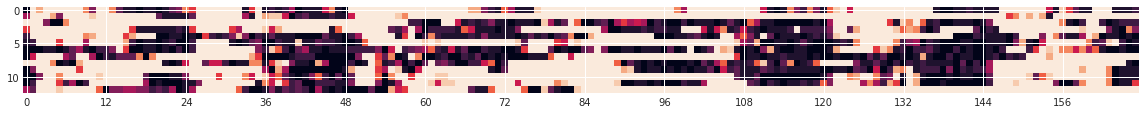

In [116]:
to_print = sums10_2
for i in range (len(to_print)):
    plt.figure(figsize=(20, 20))
    plt.imshow( 1-np.array(data_list3[to_print[i]][:2184]).reshape(13, 168))
    ax = plt.gca()
    ax.set_xticks(np.arange(0, 168, 12))
    ax.set_xticklabels(np.arange(0, 168, 12))
    ax.grid(color='w', linestyle='-', linewidth=1)
    #plt.savefig("rgb{i}.png".format(i=i))

In [119]:
worst2[:10]
worst10_2 =[item[0] for item in worst2[:10]]
worst10_2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

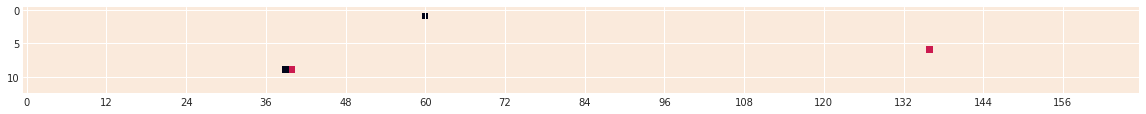

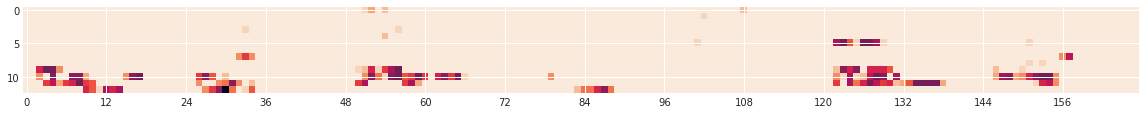

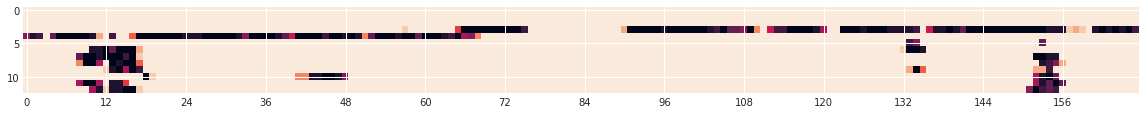

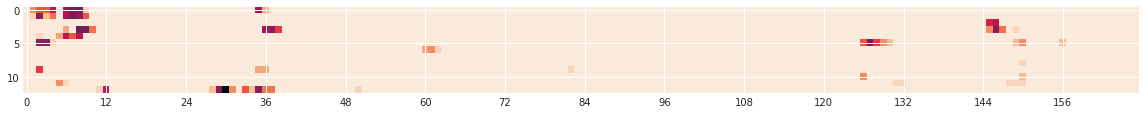

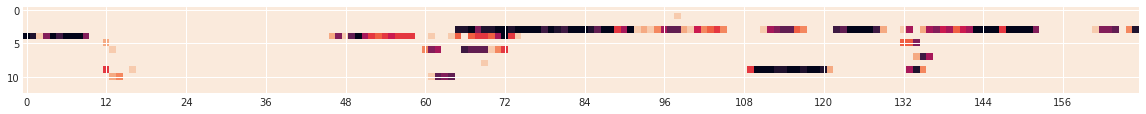

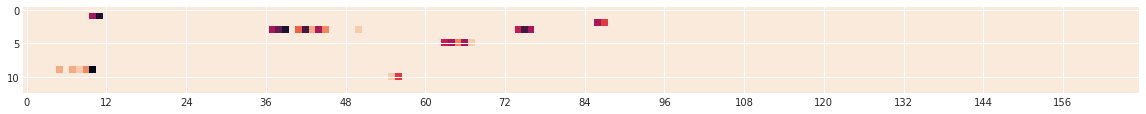

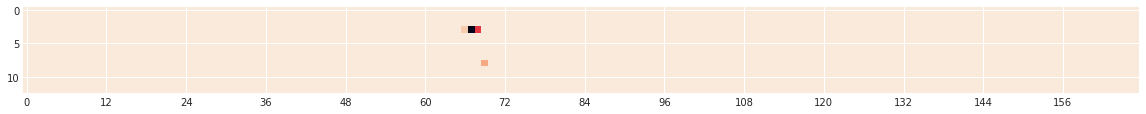

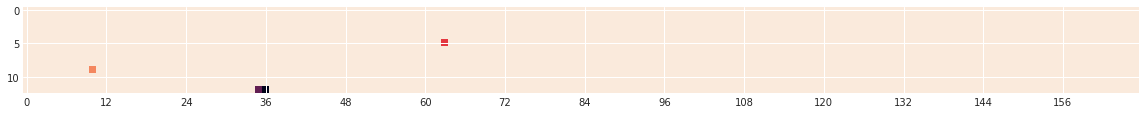

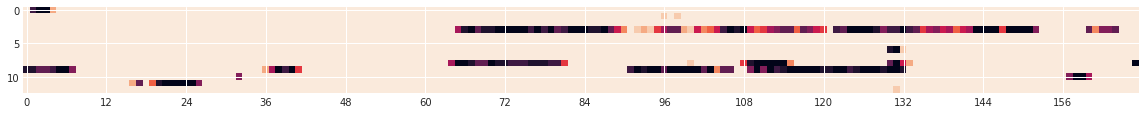

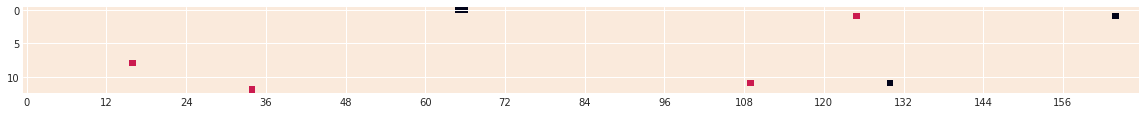

In [120]:
to_print = worst10_2
for i in range (len(to_print)):
    plt.figure(figsize=(20, 20))
    plt.imshow( 1-np.array(data_list3[to_print[i]][:2184]).reshape(13, 168))
    ax = plt.gca()
    ax.set_xticks(np.arange(0, 168, 12))
    ax.set_xticklabels(np.arange(0, 168, 12))
    ax.grid(color='w', linestyle='-', linewidth=1)
    #plt.savefig("rgb{i}.png".format(i=i))

##### Create database2

In [122]:
arrays = [np.array(item) for item in data_list3]

In [123]:
tensor_x = torch.stack([torch.FloatTensor(i) for i in arrays])

In [125]:
my_dataset2 = utils.TensorDataset(tensor_x,tensor_x)

In [215]:
torch.set_num_threads(18)
# Model
class AutoencDrop2(nn.Module):
    def __init__(self,latent_dim=20,hidden_dim1=2000, hidden_dim2=500, 
                 hidden_dim3=125):
        super(AutoencDrop2,self).__init__()
        self.fc_e1 = nn.Linear(4380,hidden_dim1)
        self.drop1 = nn.Dropout(0.8)  # drop 50% of the neuron
        self.fc_e2 = nn.Linear(hidden_dim1,hidden_dim2)
        self.drop2 = nn.Dropout(0.8)  # drop 50% of the neuron
        self.fc_e3 = nn.Linear(hidden_dim2,hidden_dim3)
        self.drop3 = nn.Dropout(0.8)  # drop 50% of the neuron
        self.fc_lat = nn.Linear(hidden_dim3,latent_dim)
        
        self.fc_d1 = nn.Linear(latent_dim,hidden_dim3)
        self.drop4 = nn.Dropout(0.8)  # drop 50% of the neuron
        self.fc_d2 = nn.Linear(hidden_dim3,hidden_dim2)
        self.drop5 = nn.Dropout(0.8)  # drop 50% of the neuron
        self.fc_d3 = nn.Linear(hidden_dim2,hidden_dim1)
        self.drop6 = nn.Dropout(0.8)  # drop 50% of the neuron
        self.fc_d4 = nn.Linear(hidden_dim1, 4380)
            
    def encoder(self,x_in):
        x = F.relu(self.fc_e1(x_in.view(-1,4380)))
        x = F.relu(self.fc_e2(x))
        x = F.relu(self.fc_e3(x))
        lat = self.fc_lat(x)
        return lat
    
    def decoder(self,z):
        z = F.relu(self.fc_d1(z))
        z = F.relu(self.fc_d2(z))
        z = F.relu(self.fc_d3(z))
        x_out = F.sigmoid(self.fc_d4(z))
        return x_out#.view(-1,1,28,28)
    
    
    def forward(self,x_in):
        z_lat = self.encoder(x_in)
        x_out = self.decoder(z_lat)
        return x_out, z_lat
model = AutoencDrop2()
model

AutoencDrop2(
  (fc_e1): Linear(in_features=4380, out_features=2000, bias=True)
  (drop1): Dropout(p=0.8)
  (fc_e2): Linear(in_features=2000, out_features=500, bias=True)
  (drop2): Dropout(p=0.8)
  (fc_e3): Linear(in_features=500, out_features=125, bias=True)
  (drop3): Dropout(p=0.8)
  (fc_lat): Linear(in_features=125, out_features=20, bias=True)
  (fc_d1): Linear(in_features=20, out_features=125, bias=True)
  (drop4): Dropout(p=0.8)
  (fc_d2): Linear(in_features=125, out_features=500, bias=True)
  (drop5): Dropout(p=0.8)
  (fc_d3): Linear(in_features=500, out_features=2000, bias=True)
  (drop6): Dropout(p=0.8)
  (fc_d4): Linear(in_features=2000, out_features=4380, bias=True)
)

In [216]:
num_epochs = 80
batch_size = 100
learning_rate = 1e-5

# Data loader
trainloader2 = DataLoader(my_dataset2, batch_size = batch_size,shuffle=True)

In [217]:
model = AutoencDrop2()
#model = autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)
losses = []

#train
for epoch in range(num_epochs):
    for data in trainloader2:
        img, _ = data
        img = Variable(img)
        # ===================forward=====================
        x_out,z_lat = model(img)
        loss = criterion(x_out, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.data[0])
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.data[0]))

#torch.save(model.state_dict(), './sim_autoencoder.pth')

epoch [1/80], loss:0.2449
epoch [2/80], loss:0.2365
epoch [3/80], loss:0.2262
epoch [4/80], loss:0.2068
epoch [5/80], loss:0.1776
epoch [6/80], loss:0.1374
epoch [7/80], loss:0.0806
epoch [8/80], loss:0.0327
epoch [9/80], loss:0.0134
epoch [10/80], loss:0.0067
epoch [11/80], loss:0.0045
epoch [12/80], loss:0.0020
epoch [13/80], loss:0.0018
epoch [14/80], loss:0.0013
epoch [15/80], loss:0.0009
epoch [16/80], loss:0.0009
epoch [17/80], loss:0.0008
epoch [18/80], loss:0.0007
epoch [19/80], loss:0.0006
epoch [20/80], loss:0.0005
epoch [21/80], loss:0.0005
epoch [22/80], loss:0.0005
epoch [23/80], loss:0.0004
epoch [24/80], loss:0.0004
epoch [25/80], loss:0.0003
epoch [26/80], loss:0.0003
epoch [27/80], loss:0.0004
epoch [28/80], loss:0.0004
epoch [29/80], loss:0.0003
epoch [30/80], loss:0.0003
epoch [31/80], loss:0.0003
epoch [32/80], loss:0.0002
epoch [33/80], loss:0.0003
epoch [34/80], loss:0.0002
epoch [35/80], loss:0.0003
epoch [36/80], loss:0.0002
epoch [37/80], loss:0.0002
epoch [38/

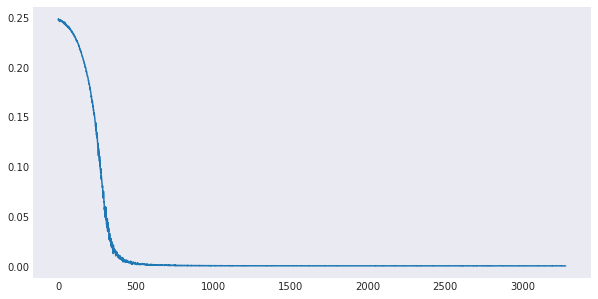

In [218]:
plt.figure(figsize = (10,5))
plt.plot(losses)
plt.show()

In [219]:
testloader2 = DataLoader(my_dataset2, batch_size=50)

#Test
def Obtain_img (model, dataloader):
    output = []
    latents = []
    running_loss = 0.0
    for data in dataloader:
        img, _ = data
        x_in = Variable(img)
        x_out, z_lat = model(x_in)
        output.append(x_out.data.numpy())
        latents.append(z_lat.data.numpy())
        loss = criterion(x_out, x_in)
        running_loss = running_loss + (loss.data[0]*x_in.size(0))
    return output, latents, running_loss/len(dataloader.dataset)

output, latents, loss = Obtain_img (model, testloader2)
print (loss)

0.00019409601614833155


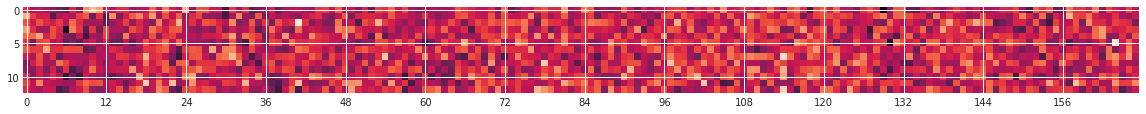

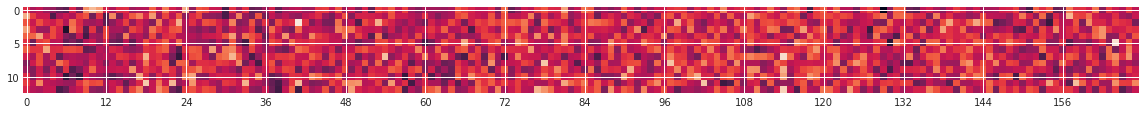

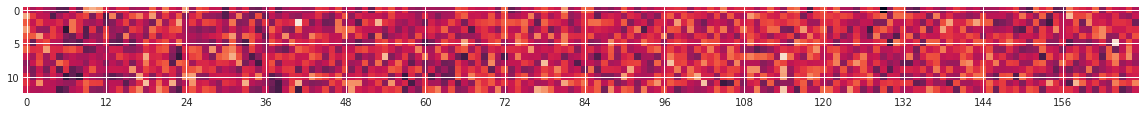

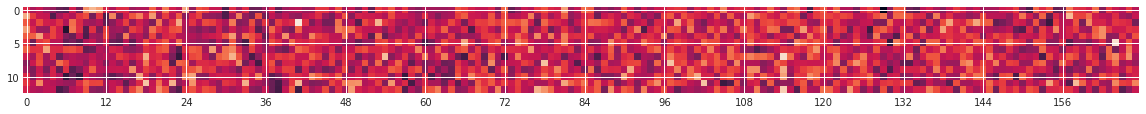

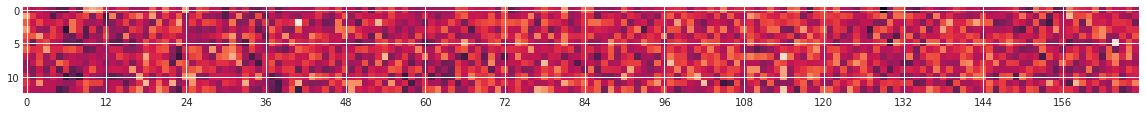

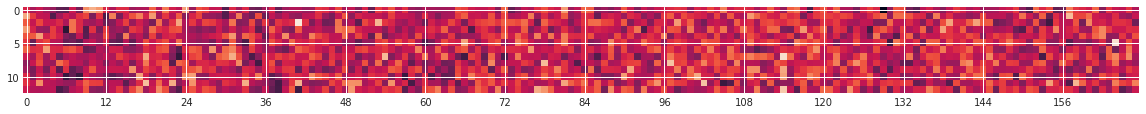

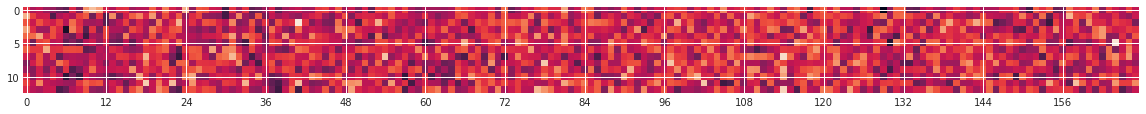

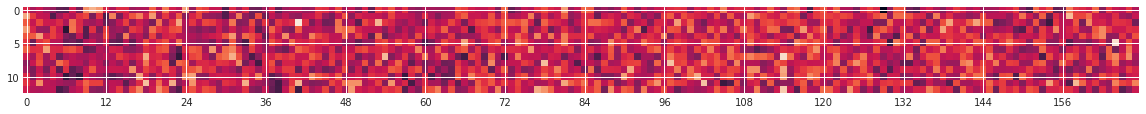

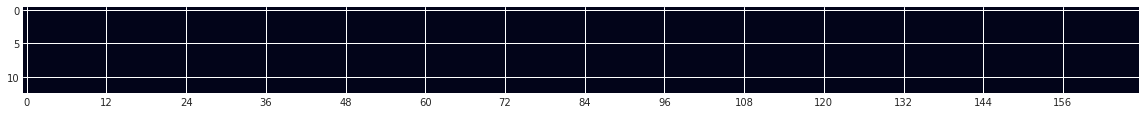

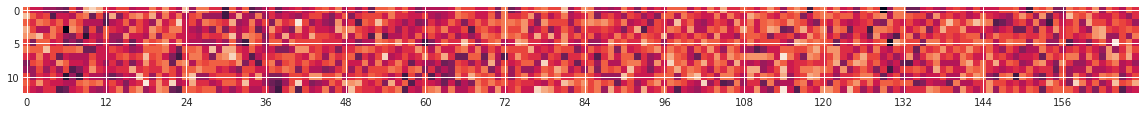

In [220]:
to_print = sums10_2
for i in range (len(to_print)):
    plt.figure(figsize=(20, 20))
    plt.imshow((1- output[i][0][:2184]).reshape(13, 168))
    ax = plt.gca()
    ax.set_xticks(np.arange(0, 168, 12))
    ax.set_xticklabels(np.arange(0, 168, 12))
    ax.grid(color='w', linestyle='-', linewidth=1)
    #plt.savefig("test2_batch32_100ep_{i}.png".format(i=i))

#### Direct t-SNE // UMAP

In [223]:
tsne = TSNE(n_components=2).fit_transform(data_list2)

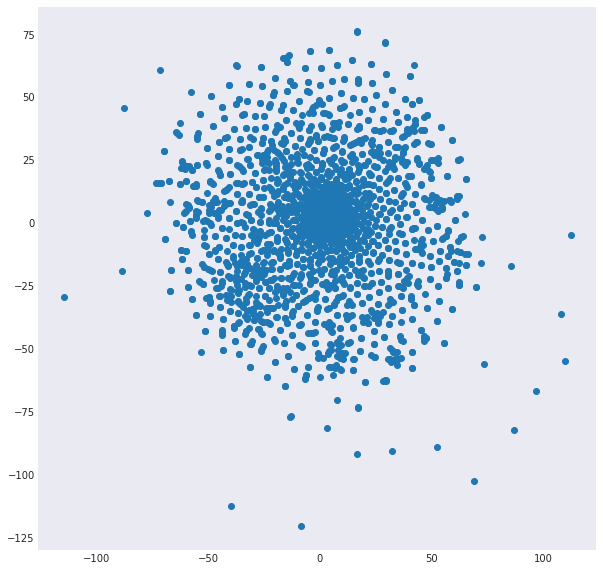

In [225]:
plt.figure(figsize=(10,10))
plt.scatter(tsne[:, 0], tsne[:, 1])#, c = all_labels)

Text(0.5,1,'Perplexity 100')

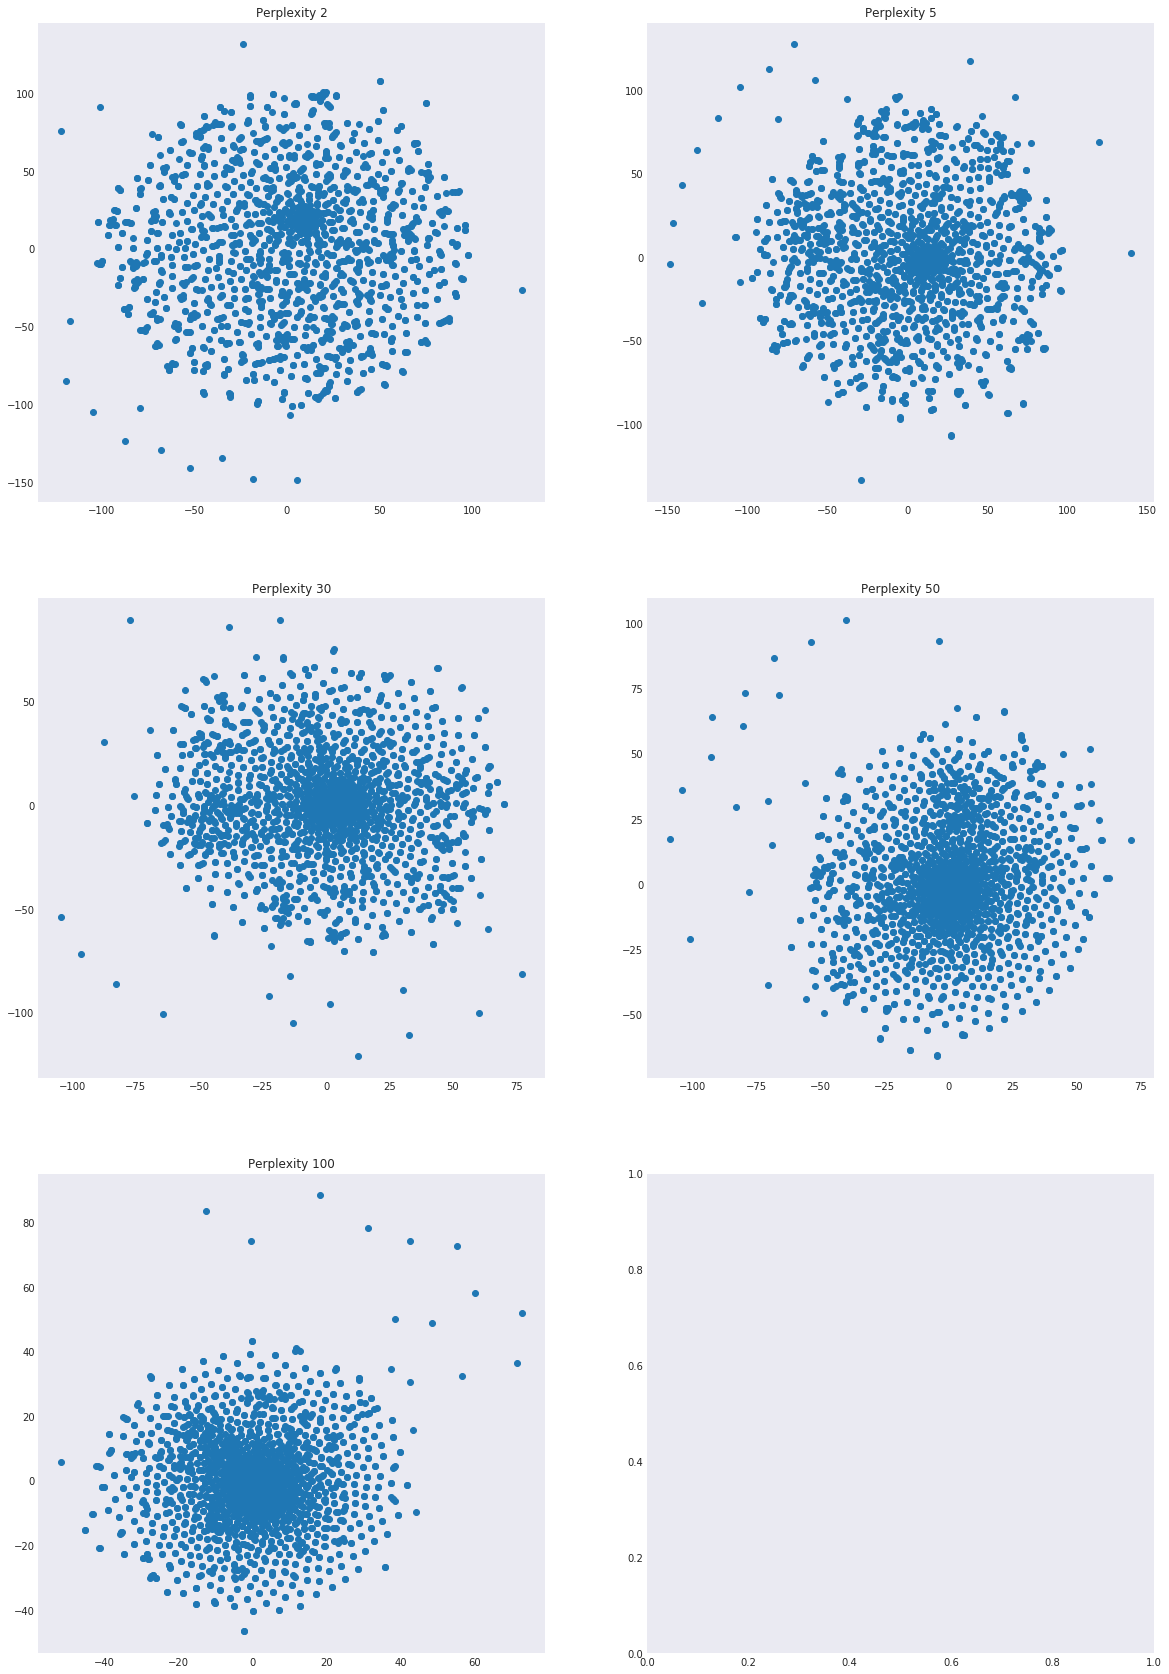

In [226]:
f, axarr = plt.subplots(3, 2, figsize=(20,30))

latent_proj = TSNE(n_components=2, perplexity=2).fit_transform(data_list2)
axarr[0, 0].scatter(latent_proj[:, 0], latent_proj[:, 1])#, c=all_labels)
axarr[0, 0].set_title('Perplexity 2')

latent_proj = TSNE(n_components=2, perplexity=5).fit_transform(data_list2)
axarr[0, 1].scatter(latent_proj[:, 0], latent_proj[:, 1])#, c=all_labels)
axarr[0, 1].set_title('Perplexity 5')

latent_proj = TSNE(n_components=2, perplexity=30).fit_transform(data_list2)
axarr[1, 0].scatter(latent_proj[:, 0], latent_proj[:, 1])#, c=all_labels)
axarr[1, 0].set_title('Perplexity 30')

latent_proj = TSNE(n_components=2, perplexity=50).fit_transform(data_list2)
axarr[1, 1].scatter(latent_proj[:, 0], latent_proj[:, 1])#, c=all_labels)
axarr[1, 1].set_title('Perplexity 50')

latent_proj = TSNE(n_components=2, perplexity=100).fit_transform(data_list2)
axarr[2, 0].scatter(latent_proj[:, 0], latent_proj[:, 1])#, c=all_labels)
axarr[2, 0].set_title('Perplexity 100')

#### t-SNE but labeled by interaction frequency

In [44]:
all_labels = [0]*2027
for i in range (len(sums)):
    if sums[i][1] <= 50:
        all_labels[sums[i][0]]= 50
    elif 50<sums[i][1]<100:
        all_labels[sums[i][0]]= 100
    else:
        all_labels[sums[i][0]]= 200


Text(0.5,1,'Perplexity 100')

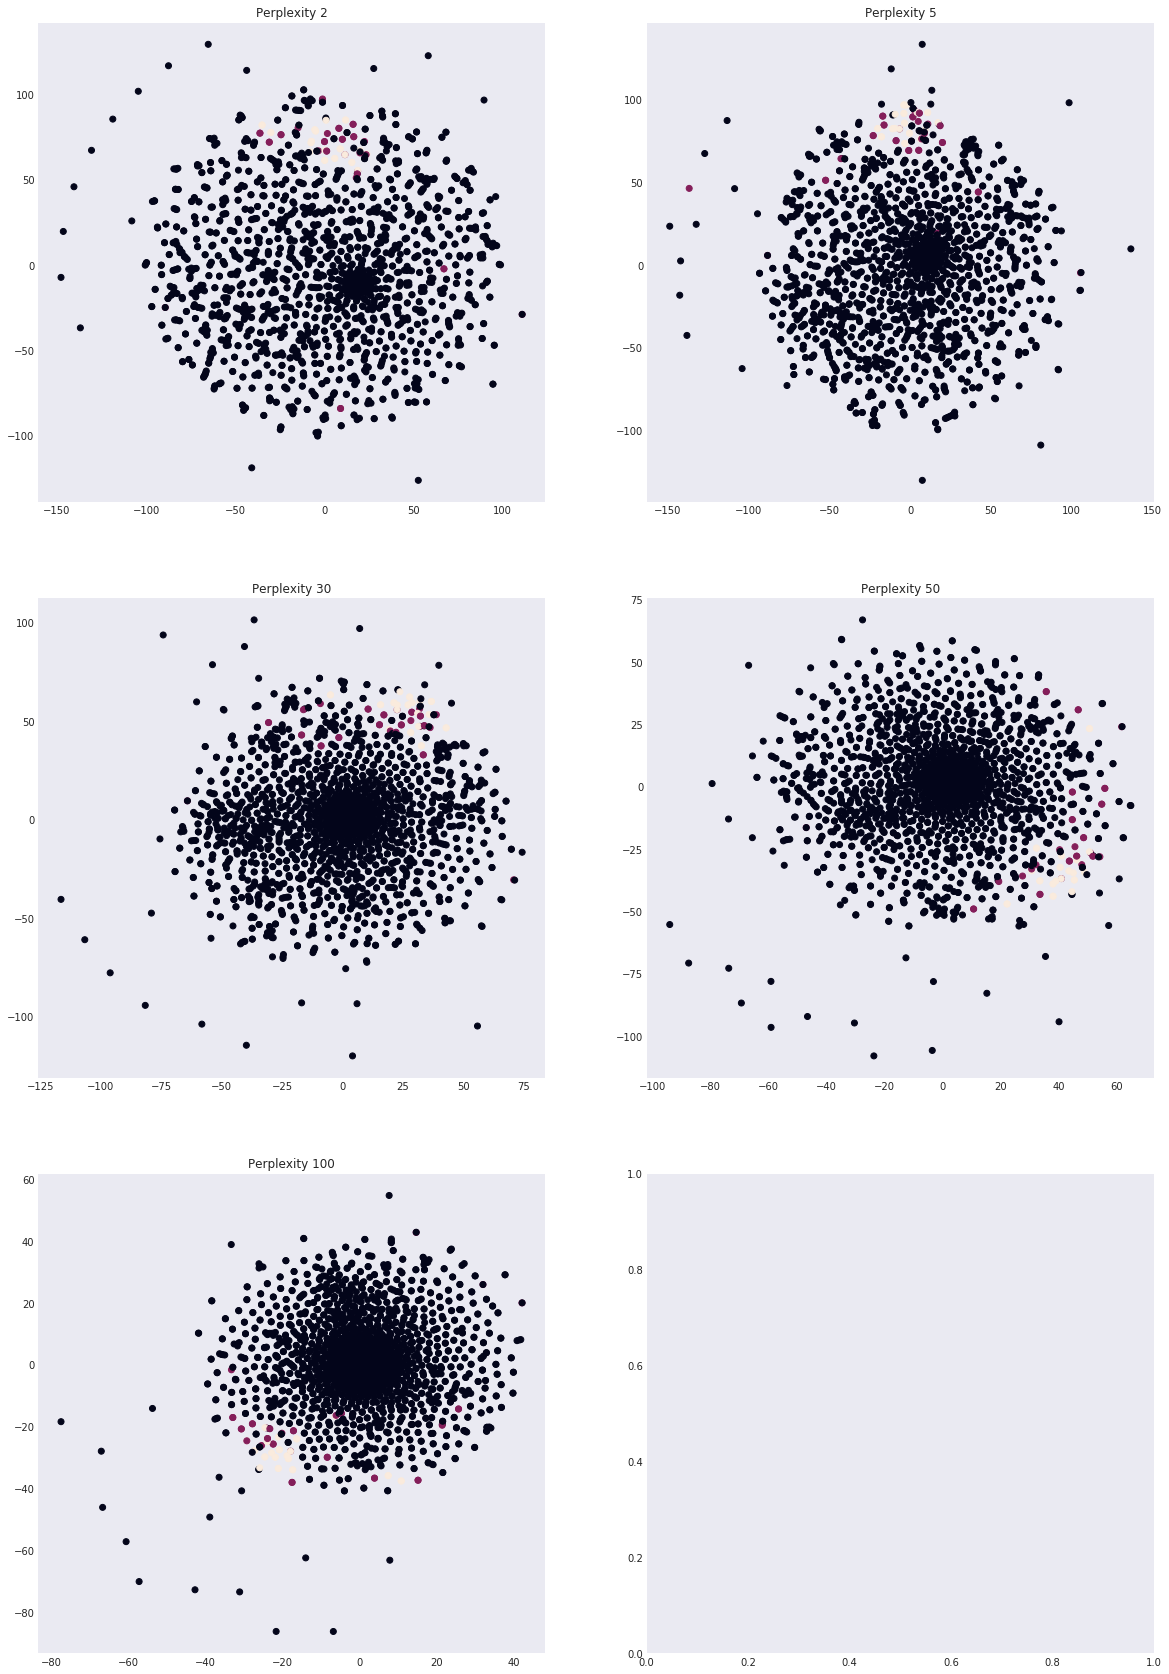

In [238]:
f, axarr = plt.subplots(3, 2, figsize=(20,30))

latent_proj = TSNE(n_components=2, perplexity=2).fit_transform(data_list2)
axarr[0, 0].scatter(latent_proj[:, 0], latent_proj[:, 1], c=all_labels)
axarr[0, 0].set_title('Perplexity 2')

latent_proj = TSNE(n_components=2, perplexity=5).fit_transform(data_list2)
axarr[0, 1].scatter(latent_proj[:, 0], latent_proj[:, 1], c=all_labels)
axarr[0, 1].set_title('Perplexity 5')

latent_proj = TSNE(n_components=2, perplexity=30).fit_transform(data_list2)
axarr[1, 0].scatter(latent_proj[:, 0], latent_proj[:, 1], c=all_labels)
axarr[1, 0].set_title('Perplexity 30')

latent_proj = TSNE(n_components=2, perplexity=50).fit_transform(data_list2)
axarr[1, 1].scatter(latent_proj[:, 0], latent_proj[:, 1], c=all_labels)
axarr[1, 1].set_title('Perplexity 50')

latent_proj = TSNE(n_components=2, perplexity=100).fit_transform(data_list2)
axarr[2, 0].scatter(latent_proj[:, 0], latent_proj[:, 1], c=all_labels)
axarr[2, 0].set_title('Perplexity 100')

#### Best 300 t-SNE

In [37]:
sums100 = [item[0] for item in sums[:300]]

In [38]:
best100 = []
for ele in sums100:
    best100.append(data_list2[ele])

In [39]:
sums4 = []
for i in range(len(best100)):
    sums4.append([i, sum(best100[i])])
del sums4[0]

In [40]:
sums4.sort(key=lambda x: x[1], reverse = True)

In [42]:
all_labels = [0]*300
for i in range (len(sums4)):
    if sums4[i][1] <= 50:
        all_labels[sums4[i][0]]= 50
    elif 50<sums4[i][1]<100:
        all_labels[sums4[i][0]]= 100
    else:
        all_labels[sums4[i][0]]= 200

Text(0.5,1,'Perplexity 100')

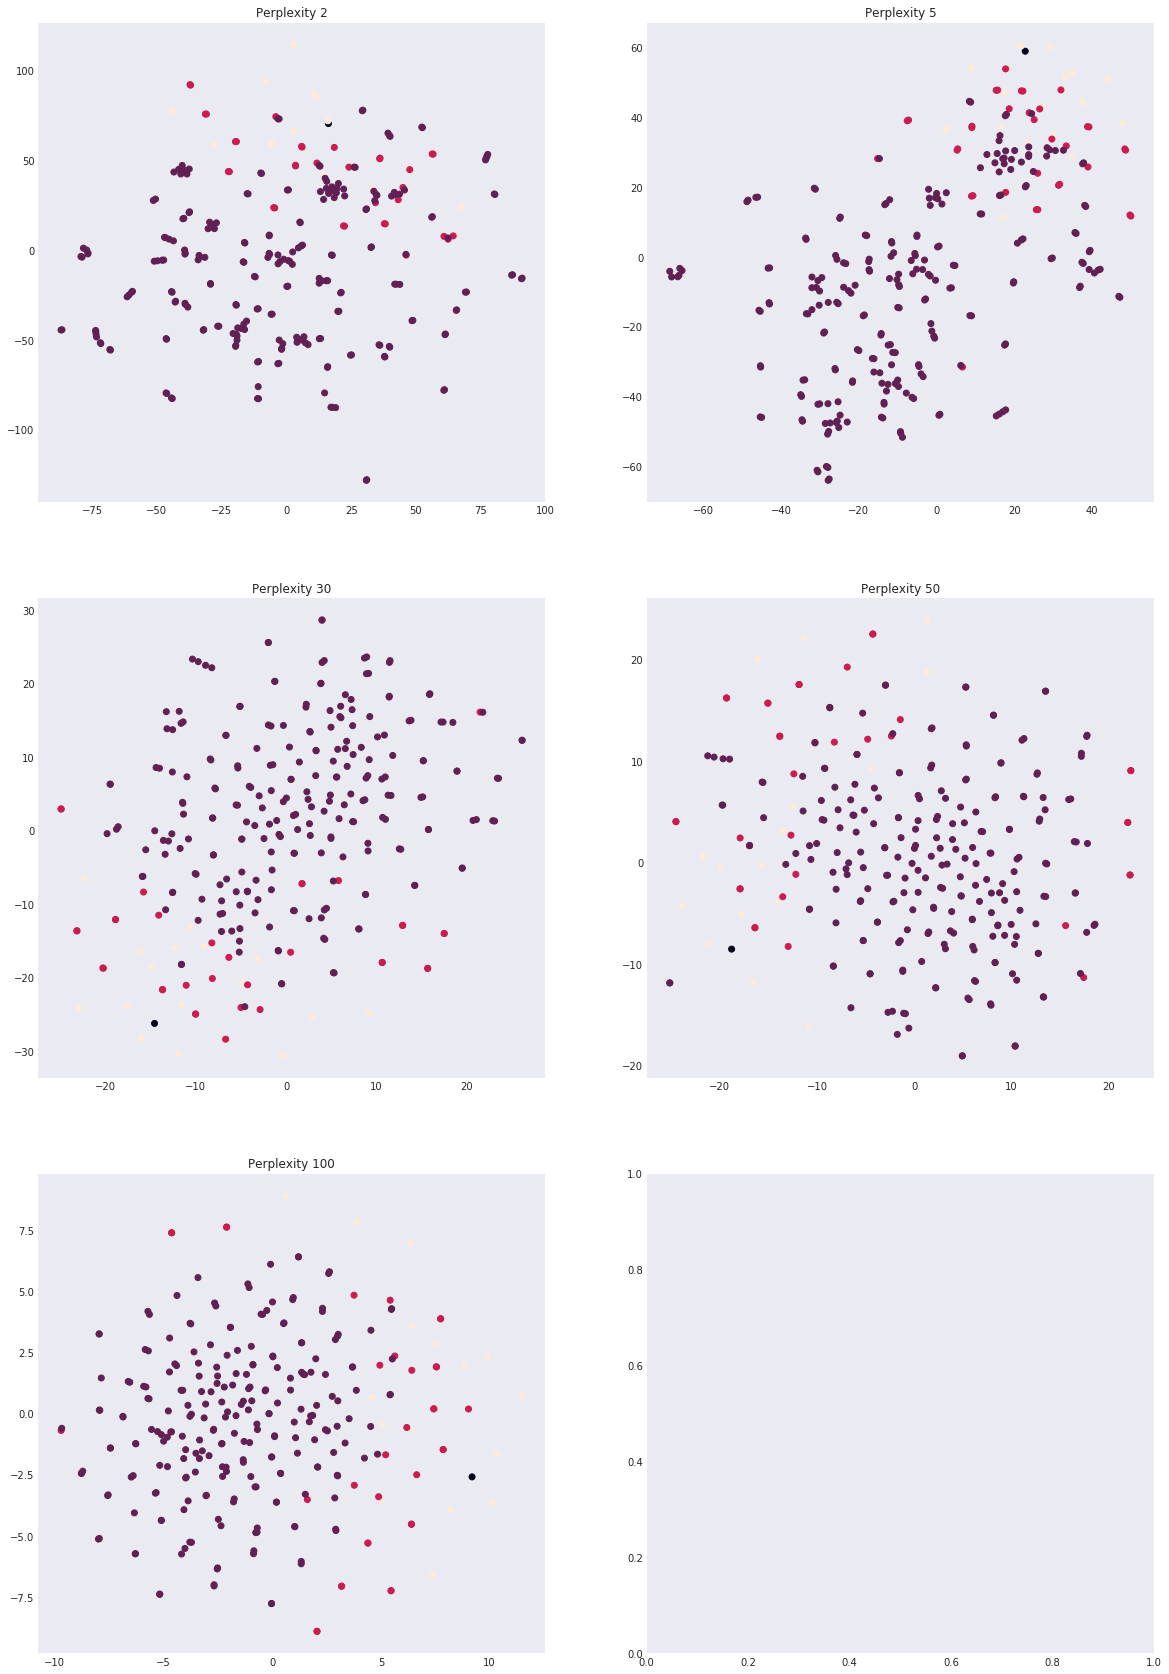

In [43]:
f, axarr = plt.subplots(3, 2, figsize=(20,30))

latent_proj = TSNE(n_components=2, perplexity=2).fit_transform(best100)
axarr[0, 0].scatter(latent_proj[:, 0], latent_proj[:, 1], c=all_labels)
axarr[0, 0].set_title('Perplexity 2')

latent_proj = TSNE(n_components=2, perplexity=5).fit_transform(best100)
axarr[0, 1].scatter(latent_proj[:, 0], latent_proj[:, 1], c=all_labels)
axarr[0, 1].set_title('Perplexity 5')

latent_proj = TSNE(n_components=2, perplexity=30).fit_transform(best100)
axarr[1, 0].scatter(latent_proj[:, 0], latent_proj[:, 1], c=all_labels)
axarr[1, 0].set_title('Perplexity 30')

latent_proj = TSNE(n_components=2, perplexity=50).fit_transform(best100)
axarr[1, 1].scatter(latent_proj[:, 0], latent_proj[:, 1], c=all_labels)
axarr[1, 1].set_title('Perplexity 50')

latent_proj = TSNE(n_components=2, perplexity=100).fit_transform(best100)
axarr[2, 0].scatter(latent_proj[:, 0], latent_proj[:, 1], c=all_labels)
axarr[2, 0].set_title('Perplexity 100')